# San Francisco Airport - Clustering

We have a dataset containing flight information at San Francisco Airport. In this project, we will use the data to perform clustering using the KMeans algorithm.

<img src="https://upload.wikimedia.org/wikipedia/commons/d/de/San_Francisco_International_Airport_-_aerial_photo.jpg" >

### Import Libraries and Dataset

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('air-traffic-passenger-statistics.csv')

In [3]:
df.head()

,Activity Period,Operating Airline,Operating Airline IATA Code,Published Airline,Published Airline IATA Code,GEO Summary,GEO Region,Activity Type Code,Price Category Code,Terminal,Boarding Area,Passenger Count
0,200507,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Deplaned,Low Fare,Terminal 1,B,27271
1,200507,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Enplaned,Low Fare,Terminal 1,B,29131
2,200507,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Thru / Transit,Low Fare,Terminal 1,B,5415
3,200507,Air Canada,AC,Air Canada,AC,International,Canada,Deplaned,Other,Terminal 1,B,35156
4,200507,Air Canada,AC,Air Canada,AC,International,Canada,Enplaned,Other,Terminal 1,B,34090


### EDA and Feature Engineering

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18885 entries, 0 to 18884
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Activity Period              18885 non-null  int64 
 1   Operating Airline            18885 non-null  object
 2   Operating Airline IATA Code  18822 non-null  object
 3   Published Airline            18885 non-null  object
 4   Published Airline IATA Code  18822 non-null  object
 5   GEO Summary                  18885 non-null  object
 6   GEO Region                   18885 non-null  object
 7   Activity Type Code           18885 non-null  object
 8   Price Category Code          18885 non-null  object
 9   Terminal                     18885 non-null  object
 10  Boarding Area                18885 non-null  object
 11  Passenger Count              18885 non-null  int64 
dtypes: int64(2), object(10)
memory usage: 1.7+ MB


In [5]:
df.describe()

,Activity Period,Passenger Count
count,18885.000000,18885.000000
mean,201179.285994,29876.744400
std,385.755460,60626.072969
min,200507.000000,1.000000
25%,200811.000000,5352.000000
50%,201204.000000,9170.000000
75%,201509.000000,20718.000000
max,201806.000000,659837.000000


The "Activity Period" data is composed of a combination of year and month. We will make it more understandable.

In [6]:
df['Activity Period'] = df['Activity Period'].astype(str)

In [7]:
df["Activity Month"]=df["Activity Period"].astype(str).str[4:]
df["Activity Year"]=df["Activity Period"].astype(str).str[:4]
df["Activity Month"]=df["Activity Month"].astype(int)
df["Activity Year"]=df["Activity Year"].astype(int)

In [8]:
df=df.drop(['Activity Period'],axis=1)

In [9]:
df.head()

,Operating Airline,Operating Airline IATA Code,Published Airline,Published Airline IATA Code,GEO Summary,GEO Region,Activity Type Code,Price Category Code,Terminal,Boarding Area,Passenger Count,Activity Month,Activity Year
0,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Deplaned,Low Fare,Terminal 1,B,27271,7,2005
1,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Enplaned,Low Fare,Terminal 1,B,29131,7,2005
2,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Thru / Transit,Low Fare,Terminal 1,B,5415,7,2005
3,Air Canada,AC,Air Canada,AC,International,Canada,Deplaned,Other,Terminal 1,B,35156,7,2005
4,Air Canada,AC,Air Canada,AC,International,Canada,Enplaned,Other,Terminal 1,B,34090,7,2005


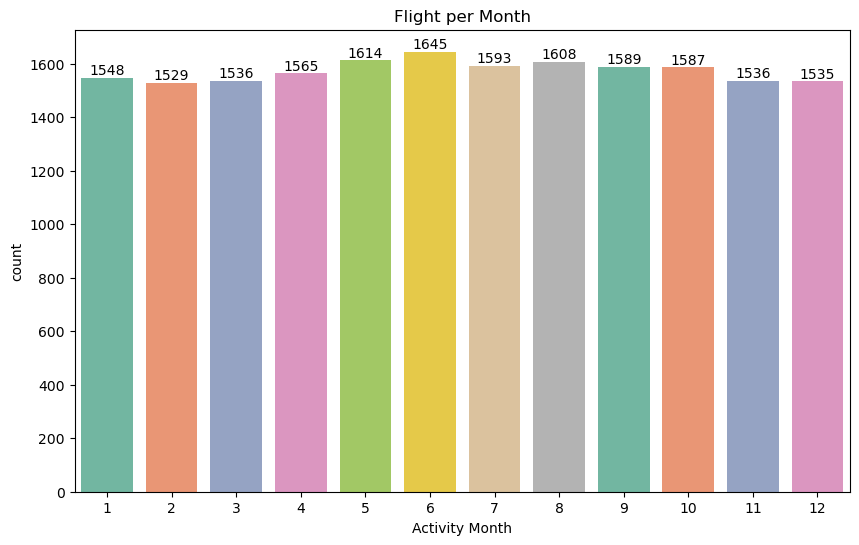

In [10]:
plt.figure(figsize=(10,6))
plt.title("Flight per Month")
ax=sns.countplot(x='Activity Month',data=df, palette='Set2');
for container in ax.containers:
    ax.bar_label(container)

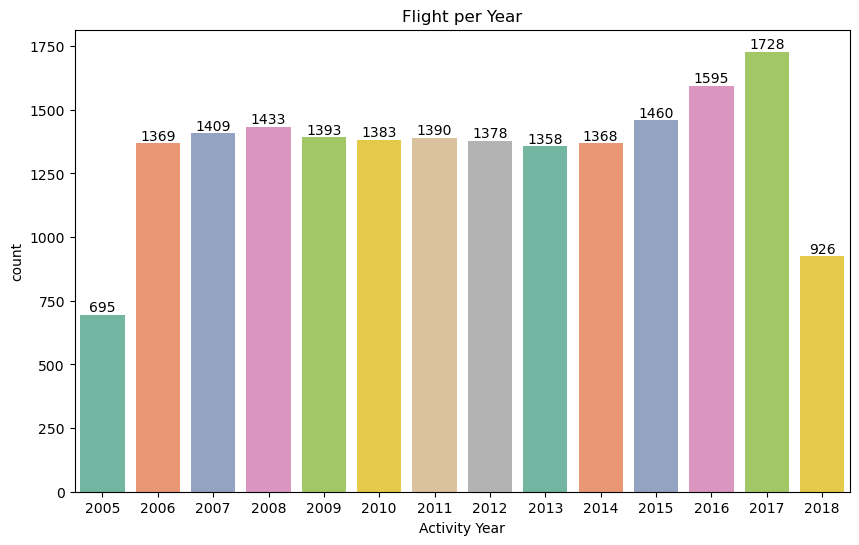

In [11]:
plt.figure(figsize=(10,6))
plt.title("Flight per Year")
ax=sns.countplot(x='Activity Year',data=df, palette='Set2');
for container in ax.containers:
    ax.bar_label(container)

In [12]:
Passenger_Count=df.groupby(df['Activity Year']).sum()['Passenger Count']
df_Passenger_Count=Passenger_Count.reset_index()

<Axes: title={'center': 'Passenger Counts per Year'}, xlabel='Activity Year', ylabel='Passenger Count'>

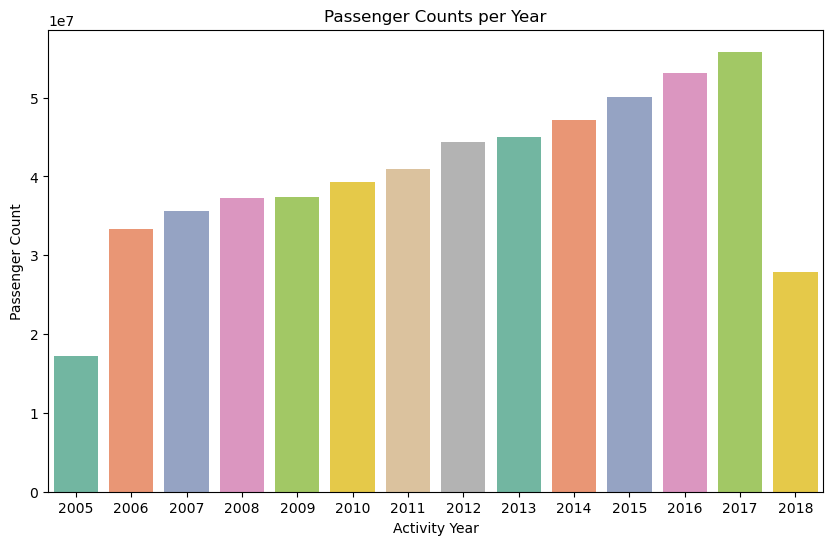

In [13]:
plt.figure(figsize=(10, 6))
plt.title("Passenger Counts per Year")
sns.barplot(x='Activity Year',y='Passenger Count',data=df_Passenger_Count,palette='Set2')

In [14]:
df.isnull().sum()

Operating Airline               0
Operating Airline IATA Code    63
Published Airline               0
Published Airline IATA Code    63
GEO Summary                     0
GEO Region                      0
Activity Type Code              0
Price Category Code             0
Terminal                        0
Boarding Area                   0
Passenger Count                 0
Activity Month                  0
Activity Year                   0
dtype: int64

We will drop that rows is empty, because very small amount of data is missing.

In [15]:
df=df.dropna()

In [16]:
df.isnull().sum()

Operating Airline              0
Operating Airline IATA Code    0
Published Airline              0
Published Airline IATA Code    0
GEO Summary                    0
GEO Region                     0
Activity Type Code             0
Price Category Code            0
Terminal                       0
Boarding Area                  0
Passenger Count                0
Activity Month                 0
Activity Year                  0
dtype: int64

In [17]:
df['Operating Airline'].value_counts()

Operating Airline
United Airlines - Pre 07/01/2013    2154
United Airlines                     1653
SkyWest Airlines                    1212
Alaska Airlines                      891
Virgin America                       462
                                    ... 
World Airways                          3
Atlas Air, Inc                         2
Evergreen International Airlines       2
Xtra Airways                           2
Icelandair EHF                         2
Name: count, Length: 84, dtype: int64

We will replace United Airlines - Pre 07/01/2013 with United Airlines because both have same IATA Code

In [18]:
df['Operating Airline'].replace('United Airlines - Pre 07/01/2013', 'United Airlines', inplace=True)

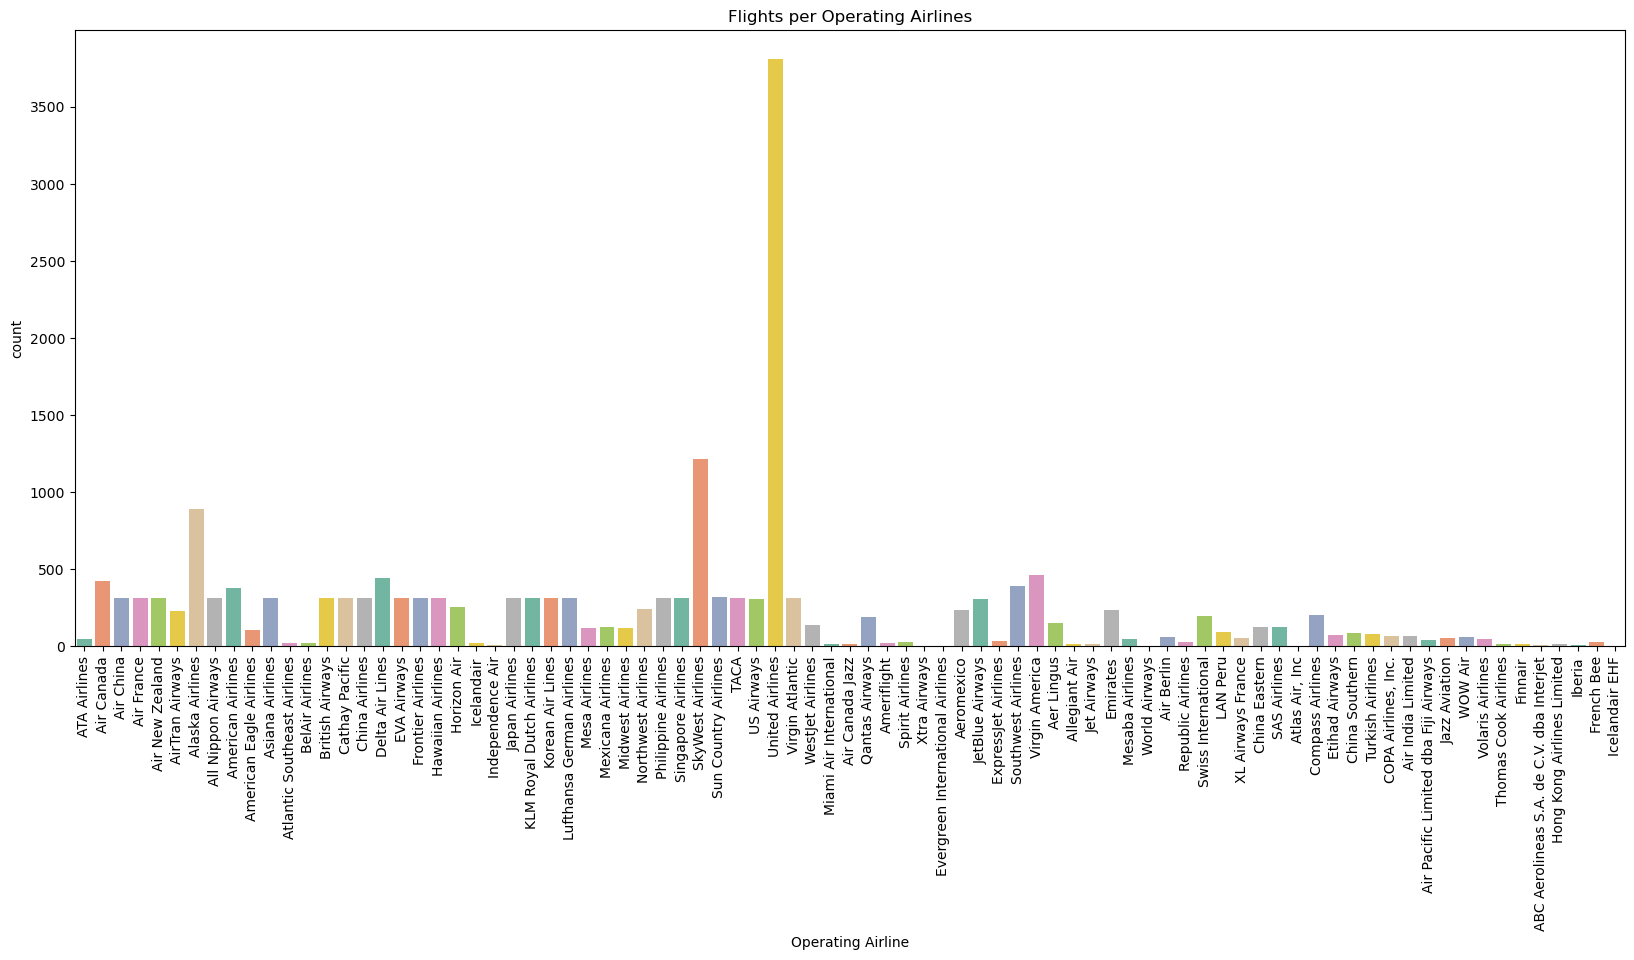

In [19]:
plt.figure(figsize=(20,8))
plt.title("Flights per Operating Airlines")
plt.xticks(rotation=90)
sns.countplot(x='Operating Airline',data=df,palette='Set2');

In [20]:
df["Published Airline"].value_counts()

Published Airline
United Airlines - Pre 07/01/2013    2645
United Airlines                     2004
Alaska Airlines                     1203
Delta Air Lines                      975
American Airlines                    588
                                    ... 
World Airways                          3
Xtra Airways                           2
Atlas Air, Inc                         2
Evergreen International Airlines       2
Icelandair EHF                         2
Name: count, Length: 74, dtype: int64

We will do the same thing for Published Airlines

In [21]:
df['Published Airline'].replace('United Airlines - Pre 07/01/2013', 'United Airlines', inplace=True)

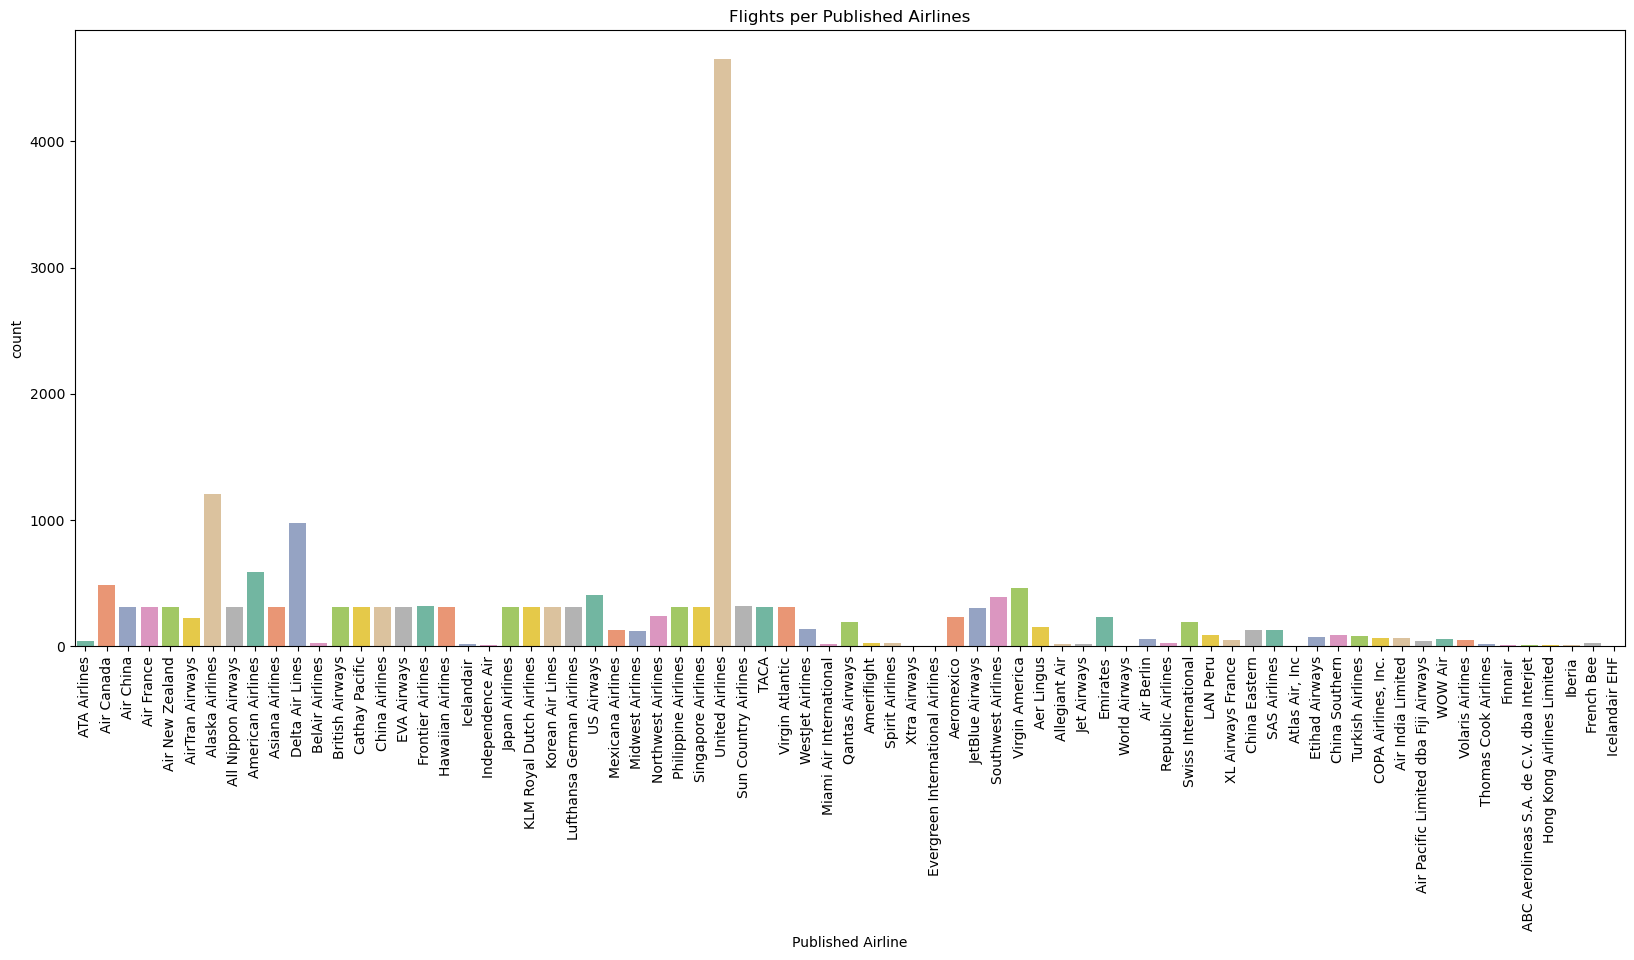

In [22]:
plt.figure(figsize=(20,8))
plt.title("Flights per Published Airlines")
plt.xticks(rotation=90)
sns.countplot(x='Published Airline',data=df, palette='Set2');

In [23]:
df['GEO Summary'].value_counts()

GEO Summary
International    11884
Domestic          6938
Name: count, dtype: int64

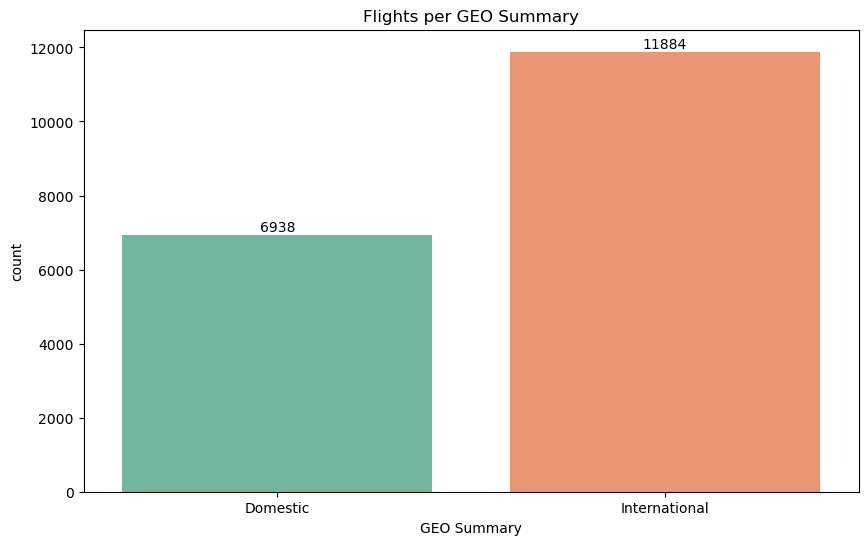

In [24]:
plt.figure(figsize=(10,6))
plt.title("Flights per GEO Summary")
ax=sns.countplot(x='GEO Summary',data=df,palette='Set2');
for container in ax.containers:
    ax.bar_label(container)

In [25]:
df['GEO Region'].value_counts()

GEO Region
US                     6938
Asia                   4072
Europe                 2786
Canada                 1794
Mexico                 1455
Australia / Oceania     951
Central America         381
Middle East             354
South America            91
Name: count, dtype: int64

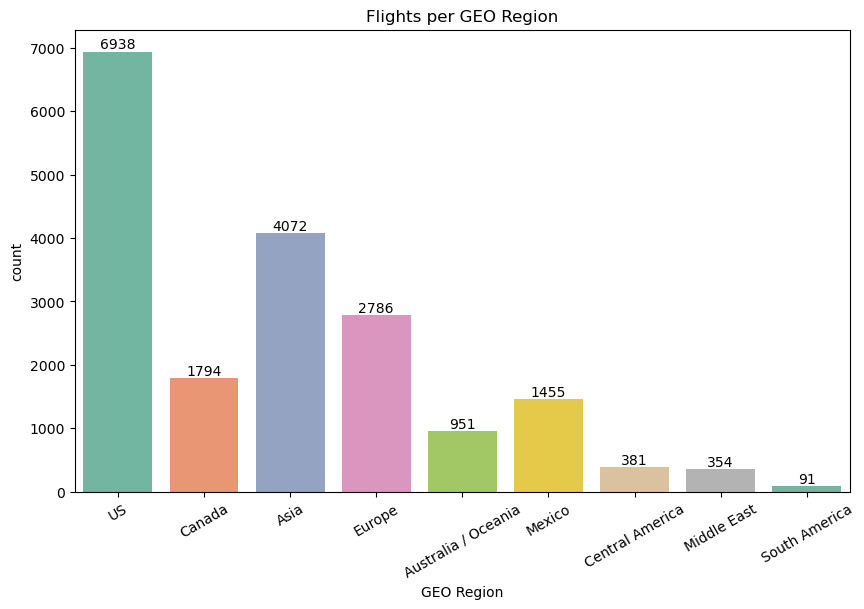

In [26]:
plt.figure(figsize=(10,6))
plt.title("Flights per GEO Region")
plt.xticks(rotation=30)
ax=sns.countplot(x='GEO Region',data=df,palette='Set2');
for container in ax.containers:
    ax.bar_label(container)

In [27]:
df['Activity Type Code'].value_counts()

Activity Type Code
Enplaned          8901
Deplaned          8876
Thru / Transit    1045
Name: count, dtype: int64

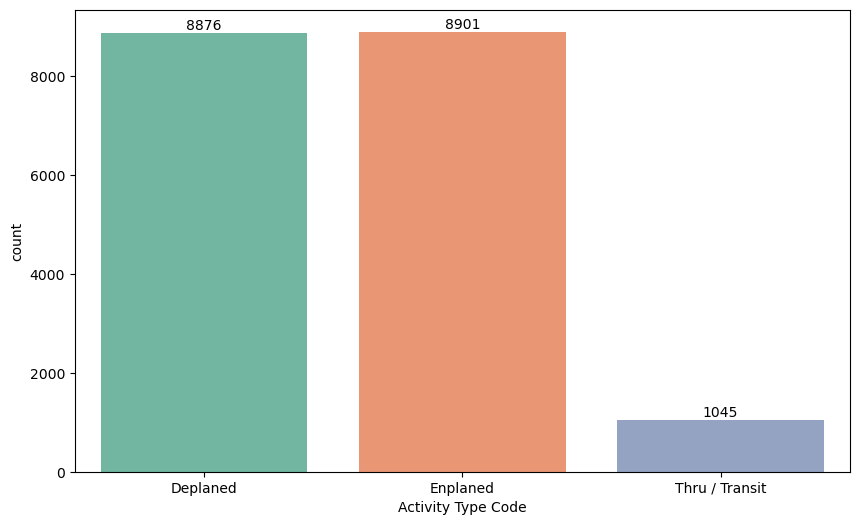

In [28]:
plt.figure(figsize=(10,6))
ax=sns.countplot(x='Activity Type Code',data=df,palette='Set2');
for container in ax.containers:
    ax.bar_label(container)

In [29]:
df['Price Category Code'].value_counts()

Price Category Code
Other       16496
Low Fare     2326
Name: count, dtype: int64

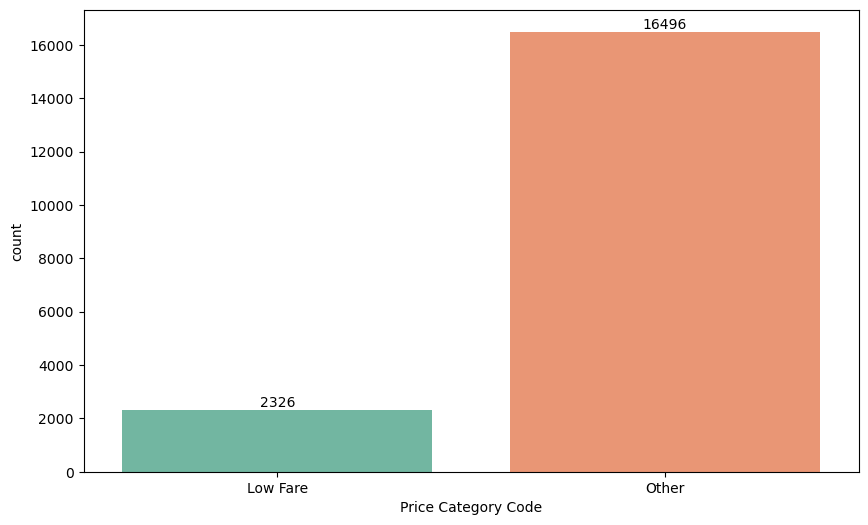

In [30]:
plt.figure(figsize=(10,6))
ax=sns.countplot(x='Price Category Code',data=df,palette='Set2');
for container in ax.containers:
    ax.bar_label(container)

In [31]:
df['Terminal'].value_counts()

Terminal
International    11901
Terminal 1        3610
Terminal 3        2699
Terminal 2         586
Other               26
Name: count, dtype: int64

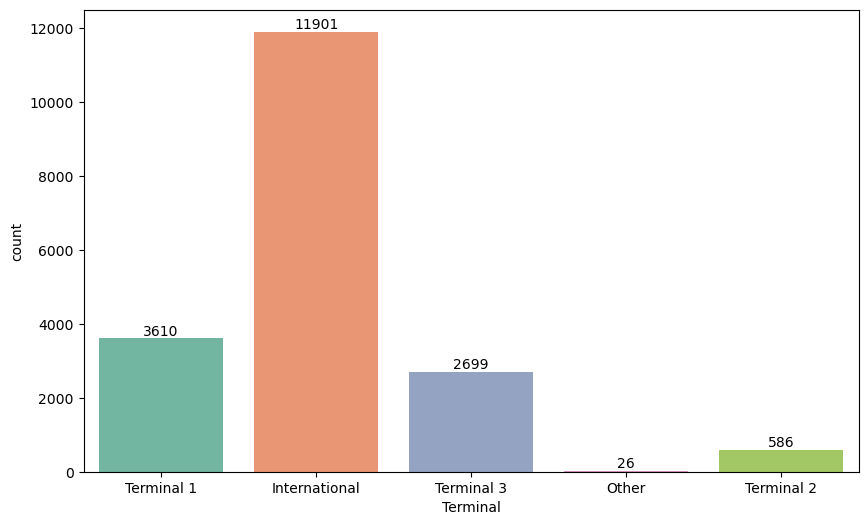

In [32]:
plt.figure(figsize=(10,6))
ax=sns.countplot(x='Terminal',data=df,palette='Set2');
for container in ax.containers:
    ax.bar_label(container)

In [33]:
df['Boarding Area'].value_counts()

Boarding Area
A        6622
G        5299
B        2128
F        1682
C        1462
E        1017
D         586
Other      26
Name: count, dtype: int64

In [34]:
x=pd.get_dummies(df,drop_first=True)

### Clustering the Data

In [35]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import KElbowVisualizer
from scipy.cluster.hierarchy import dendrogram,linkage

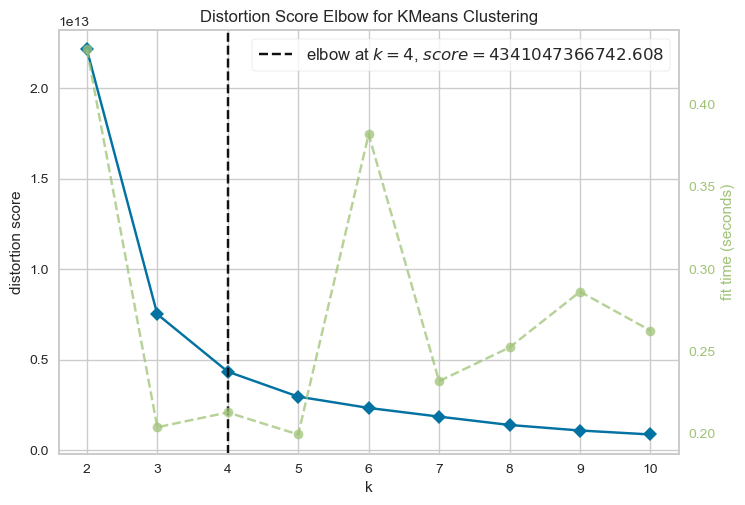

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [36]:
km=KMeans()
vis=KElbowVisualizer(km,K=(2,10))
vis.fit(x)
vis.show()

In [37]:
model=KMeans(4)

In [38]:
model=model.fit(x)

In [39]:
pred=model.predict(x)

In [40]:
x['cluster']=pred
df['cluster']=pred

In [41]:
x.head()

,Passenger Count,Activity Month,Activity Year,Operating Airline_ATA Airlines,Operating Airline_Aer Lingus,Operating Airline_Aeromexico,Operating Airline_Air Berlin,Operating Airline_Air Canada,Operating Airline_Air Canada Jazz,Operating Airline_Air China,...,Terminal_Terminal 2,Terminal_Terminal 3,Boarding Area_B,Boarding Area_C,Boarding Area_D,Boarding Area_E,Boarding Area_F,Boarding Area_G,Boarding Area_Other,cluster
0,27271,7,2005,True,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,0
1,29131,7,2005,True,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,0
2,5415,7,2005,True,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,0
3,35156,7,2005,False,False,False,False,True,False,False,...,False,False,True,False,False,False,False,False,False,3
4,34090,7,2005,False,False,False,False,True,False,False,...,False,False,True,False,False,False,False,False,False,0


In [42]:
silhouette_score(x,pred)

0.7860957752582788

In [43]:
x["cluster"].value_counts()

cluster
0    15288
3     2005
2     1138
1      391
Name: count, dtype: int64

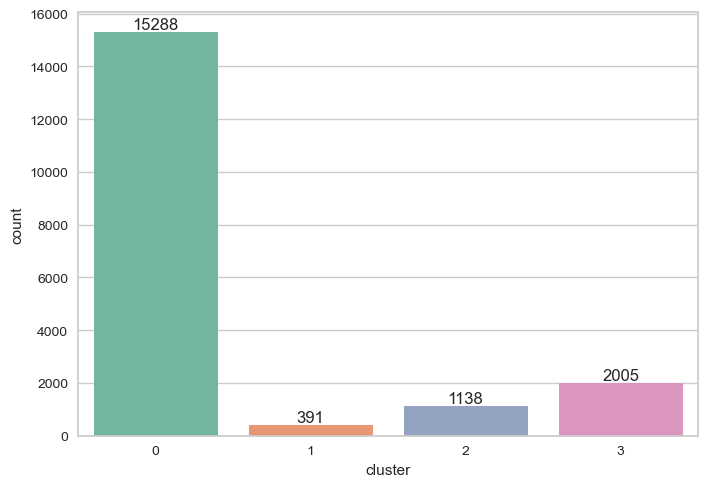

In [44]:
ax=sns.countplot(x='cluster',data=x,palette='Set2');
for container in ax.containers:
    ax.bar_label(container)

Text(0, 0.5, 'Passenger Count')

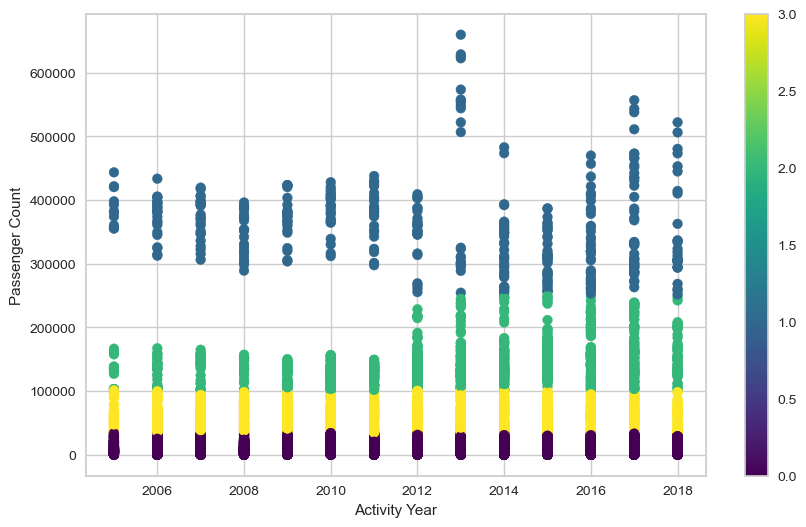

In [45]:
plt.figure(figsize=(10,6))
plt.scatter(x['Activity Year'], x['Passenger Count'], c=pred, cmap='viridis')
plt.colorbar()
plt.xlabel('Activity Year')
plt.ylabel('Passenger Count')

Text(0, 0.5, 'Passenger Count')

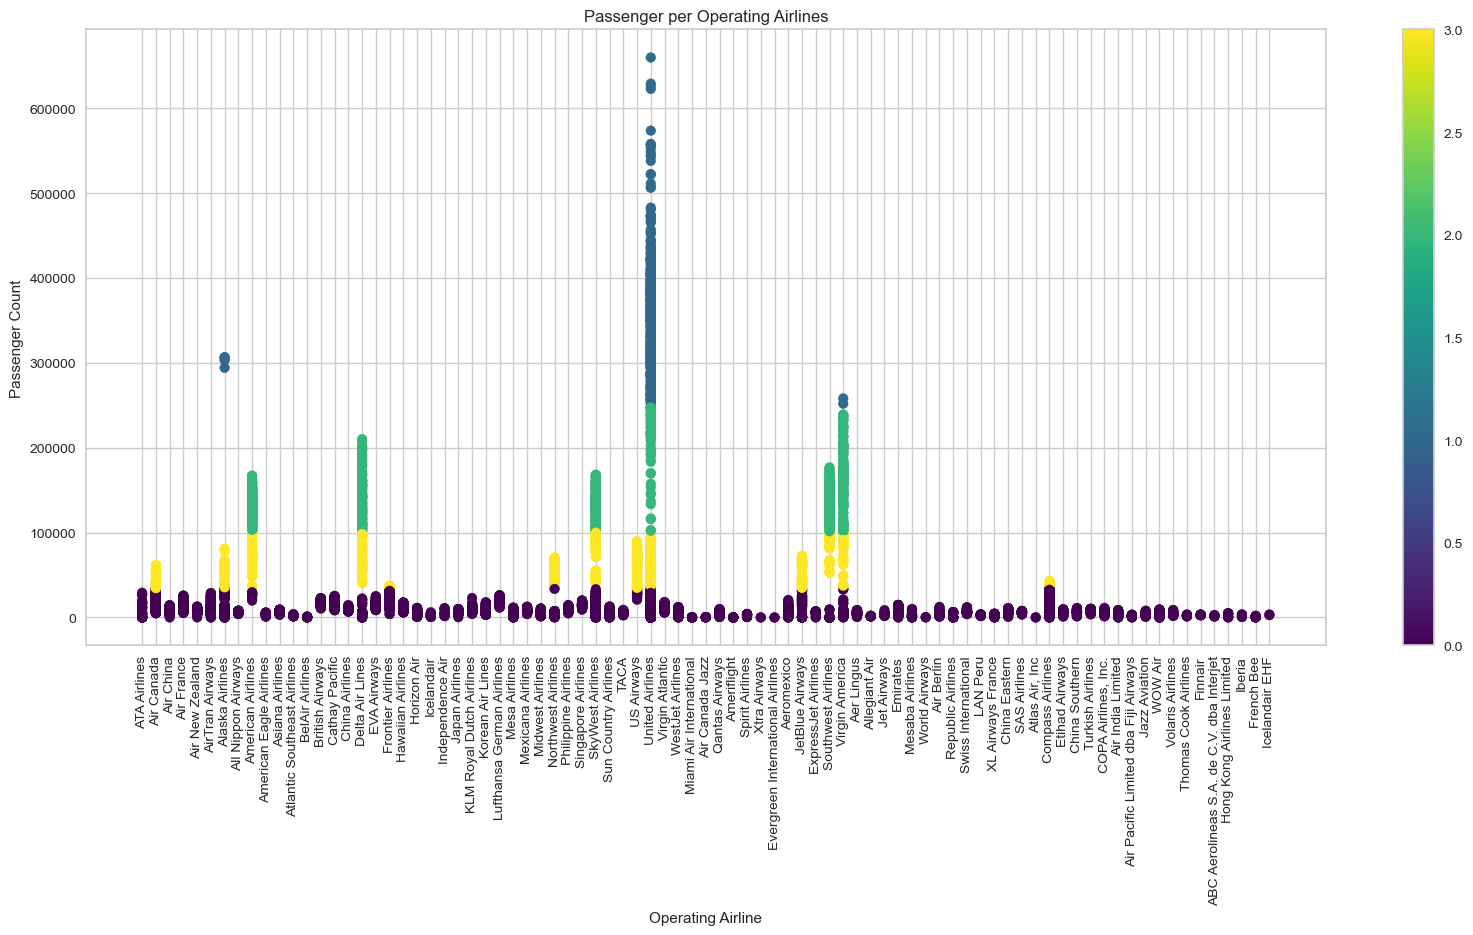

In [46]:
plt.figure(figsize=(20,8))
plt.title("Passenger per Operating Airlines")
plt.xticks(rotation=90)
plt.scatter(df['Operating Airline'], df['Passenger Count'], c=pred, cmap='viridis')
plt.colorbar()
plt.xlabel('Operating Airline')
plt.ylabel('Passenger Count')

### Conclusion

We read our dataset containing flight data from San Francisco airport using the pandas library. We applied exploratory data analysis and feature engineering steps to the data. During these steps, we utilized data visualization tools. Afterward, we used Yellowbrick to determine the number of distinct clusters for the data using the elbow method. Based on the results, we divided the data into four separate clusters using the KMeans algorithm. By visualizing the data, we can infer that the clustering was done based on the number of passengers on the flights.